In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/MAAC1/maac')

In [1]:
import algo
import utils
import argparse

In [2]:
parser = argparse.ArgumentParser(description="Experimenting Actor-Attention-Critic")
parser.add_argument("--env_id", default="1", help="Name of environment")
parser.add_argument("--buffer_length", default=int(1e6), type=int)
parser.add_argument("--n_episodes", default=1, type=int)
parser.add_argument("--climate_zone", default=5, type=int)
parser.add_argument("--episode_length", default=8760*4-1, type=int)
parser.add_argument("--batch_size",
                    default=1024, type=int,
                    help="Batch size for training")
parser.add_argument("--update_after", default=3000)
parser.add_argument("--update_every", default=50, type=int)
parser.add_argument("--num_updates", default=10, type=int,
                    help="Number of updates per update cycle")
parser.add_argument("--exploration", default=6000, type=int)

_StoreAction(option_strings=['--exploration'], dest='exploration', nargs=None, const=None, default=8, type=<class 'int'>, choices=None, help=None, metavar=None)

In [3]:
config, unknown = parser.parse_known_args()

In [4]:
from main import run
import matplotlib.pyplot as plt
env = run(config)

/Users/xiejiahan/miniforge3/envs/RLinDR/lib/python3.8/site-packages/pyparsing.py:943: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  collections.MutableMapping.register(ParseResults)
/Users/xiejiahan/miniforge3/envs/RLinDR/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/xiejiahan/miniforge3/envs/RLinDR/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


The id of the environment is 1; 

AttentionSAC initialized from environment
Attention agent created
Attention agent created
Attention agent created
Attention agent created
Attention agent created
Attention agent created
Attention agent created
Attention agent created
Attention agent created
Created algo - AttentionSAC 


/Users/xiejiahan/PycharmProjects/CityLearn/maac/algo/attention_sac.py:128: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  grad_norm = torch.nn.utils.clip_grad_norm(self.critic.parameters(), 10 * self.num_agents)


running


In [6]:
env.cost()

{'ramping': 3.3738694,
 '1-load_factor': 2.478841900801549,
 'average_daily_peak': 2.2392178,
 'peak_demand': 2.5519612,
 'net_electricity_consumption': 1.3368365,
 'carbon_emissions': 1.3399248,
 'total': 2.220108588532588,
 'coordination_score': 2.6609725654065333}

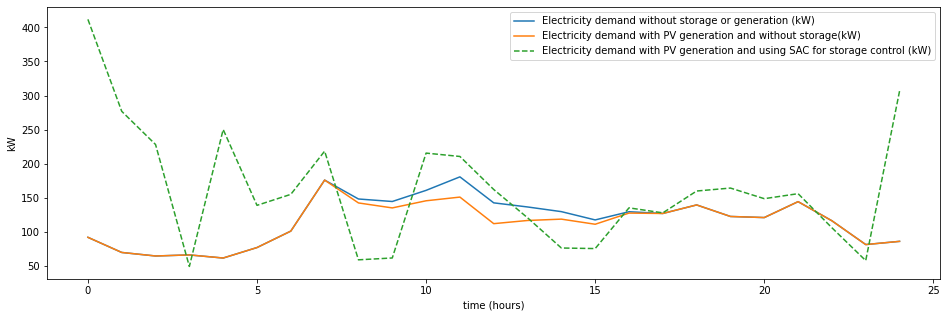

In [5]:
sim_period = (0, config.episode_length)
interval = range(sim_period[0], sim_period[1])
plt.figure(figsize=(16, 5))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)',
            'Electricity demand with PV generation and without storage(kW)',
            'Electricity demand with PV generation and using SAC for storage control (kW)'])

In [18]:
# Plotting summer operation in the last year
interval = range(8760*3 + 24*30*6, 8760*3 + 24*30*6 + 24*10)
plt.figure(figsize=(16,5))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)',
            'Electricity demand with PV generation and without storage(kW)',
            'Electricity demand with PV generation and using RBC for storage(kW)'])